In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
# @ Ramendra Kumar
# Follow with the slides named 'Bayes_&_Naive_Bayes_Classification', provided with it.

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


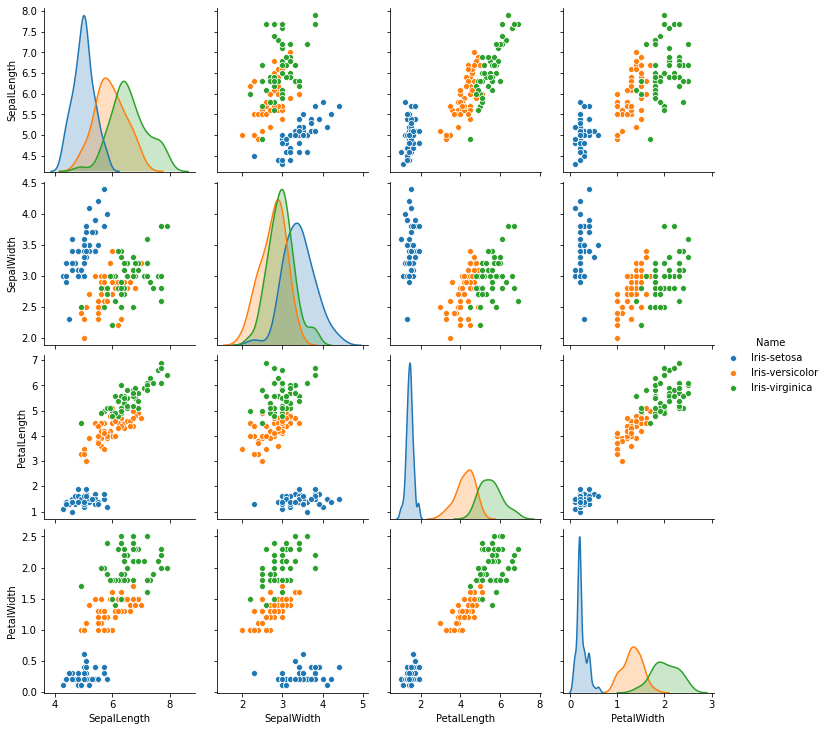

In [3]:
sns.pairplot(data=data, hue="Name")

### 1. Understanding the concept of Gausian Bayes | Univariate Gaussian Distribution
#### Taking only sepal length and modeling the classification problem with univariate Gaussian distribution.

In [4]:
data['Name'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Name, dtype: int64

In [5]:
np.unique(data['Name'].values,return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [6]:
class_data=np.unique(data['Name'],return_counts=True)
print('unique class :',class_data[0],'\n','Counts: ', class_data[1])
p_classes=class_data[1]/np.sum(class_data[1])
print('Probability of each classe: ',p_classes)

unique class : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 
 Counts:  [50 50 50]
Probability of each classe:  [0.33333333 0.33333333 0.33333333]


In [7]:
## Separating three types of data
d_setosa=data.loc[data['Name']=='Iris-setosa','SepalLength'].values
d_versicolor=data.loc[data['Name']=='Iris-versicolor','SepalLength'].values
d_virginica=data.loc[data['Name']=='Iris-virginica','SepalLength'].values

#### Plotting Histogram for any one type of flower, similar for rest. 

(array([0.42666667, 0.53333333, 0.74666667, 1.28      , 1.17333333,
        0.64      , 0.21333333, 0.32      ]),
 array([4.3   , 4.4875, 4.675 , 4.8625, 5.05  , 5.2375, 5.425 , 5.6125,
        5.8   ]),
 <BarContainer object of 8 artists>)

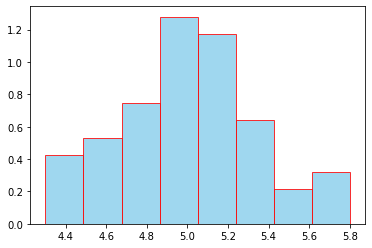

In [8]:
## plotting for setosa 
plt.hist(d_setosa,8, density=True,color='skyblue',alpha=0.8,label = 'Setosa',edgecolor='r')
# first argument is data, second argument is bins into which data is divided. Visit the documentation 
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

#### Plotting Normal Porbability Distribution Function for any one type of flower, similar for rest.
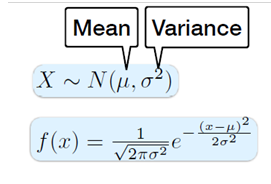

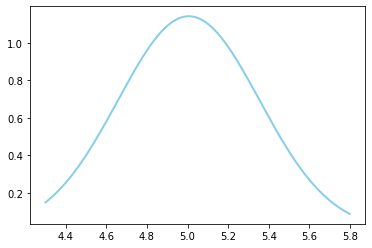

In [9]:
xx = np.arange(min(d_setosa), max(d_setosa),0.001)
u=np.mean(d_setosa)
sd=np.std(d_setosa)
xx= np.arange(min(d_setosa), max(d_setosa),0.001) ## Iris Setosa
yy=(1/(sd * np.sqrt(2 * np.pi))) *np.exp( - (xx- u)**2 / (2 * sd**2)) # Gaussian pdf implemented
# The same above pdf function is implemented inside stats library funtion --> stas.nor.pdf--> given below: 
# yy = stats.norm.pdf(xx,loc=np.mean(d_setosa),scale=np.std(d_setosa)) # Unhash it, hash 'yy' & run, will get same result.
plt.plot(xx, yy, 'skyblue', lw=2)

#### Combining both together

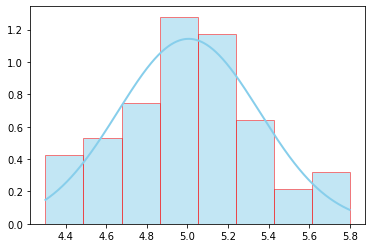

In [10]:
u=np.mean(d_setosa)
sd=np.std(d_setosa)
xx= np.arange(min(d_setosa), max(d_setosa),0.001) ## Iris Setosa
plt.hist(d_setosa,8, density=True,color='skyblue',alpha=0.5,label = 'Setosa',edgecolor='r')
yy=(1/(sd * np.sqrt(2 * np.pi))) *np.exp( - (xx- u)**2 / (2 * sd**2))
plt.plot(xx, yy, 'skyblue', lw=2)

#### Making a function  so that distribution of all three type of flower can be seen in one plot easily.

In [11]:
def distribution_plot(data,class_name,c='red'):
    xx = np.arange(min(data), max(data),0.001) ## Iris_Virginica
    #plt.hist(data,8, density=True,color=c,alpha=0.5,label = class_name,edgecolor='r')
    # we can plot histogram as well,supressed here, check by unhashing it.
    yy = stats.norm.pdf(xx,loc=np.mean(data),scale=np.std(data))
    plt.plot(xx, yy, 'red',color=c,label = class_name, lw=2)
    plt.legend()

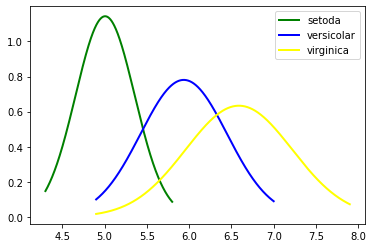

In [12]:
distribution_plot(d_setosa,class_name='setoda',c='green')        # for plotting distribution of setosa 
distribution_plot(d_versicolor,class_name='versicolar',c='blue') # for plotting distribution of versicolar 
distribution_plot(d_virginica,class_name='virginica',c='yellow') # for plotting distribution of verginica 
plt.show()

### Say we want to know type of flower for which Sepal Lenght, X=5.3 (or any value).
### Now, we have to apply Bayes Rule:

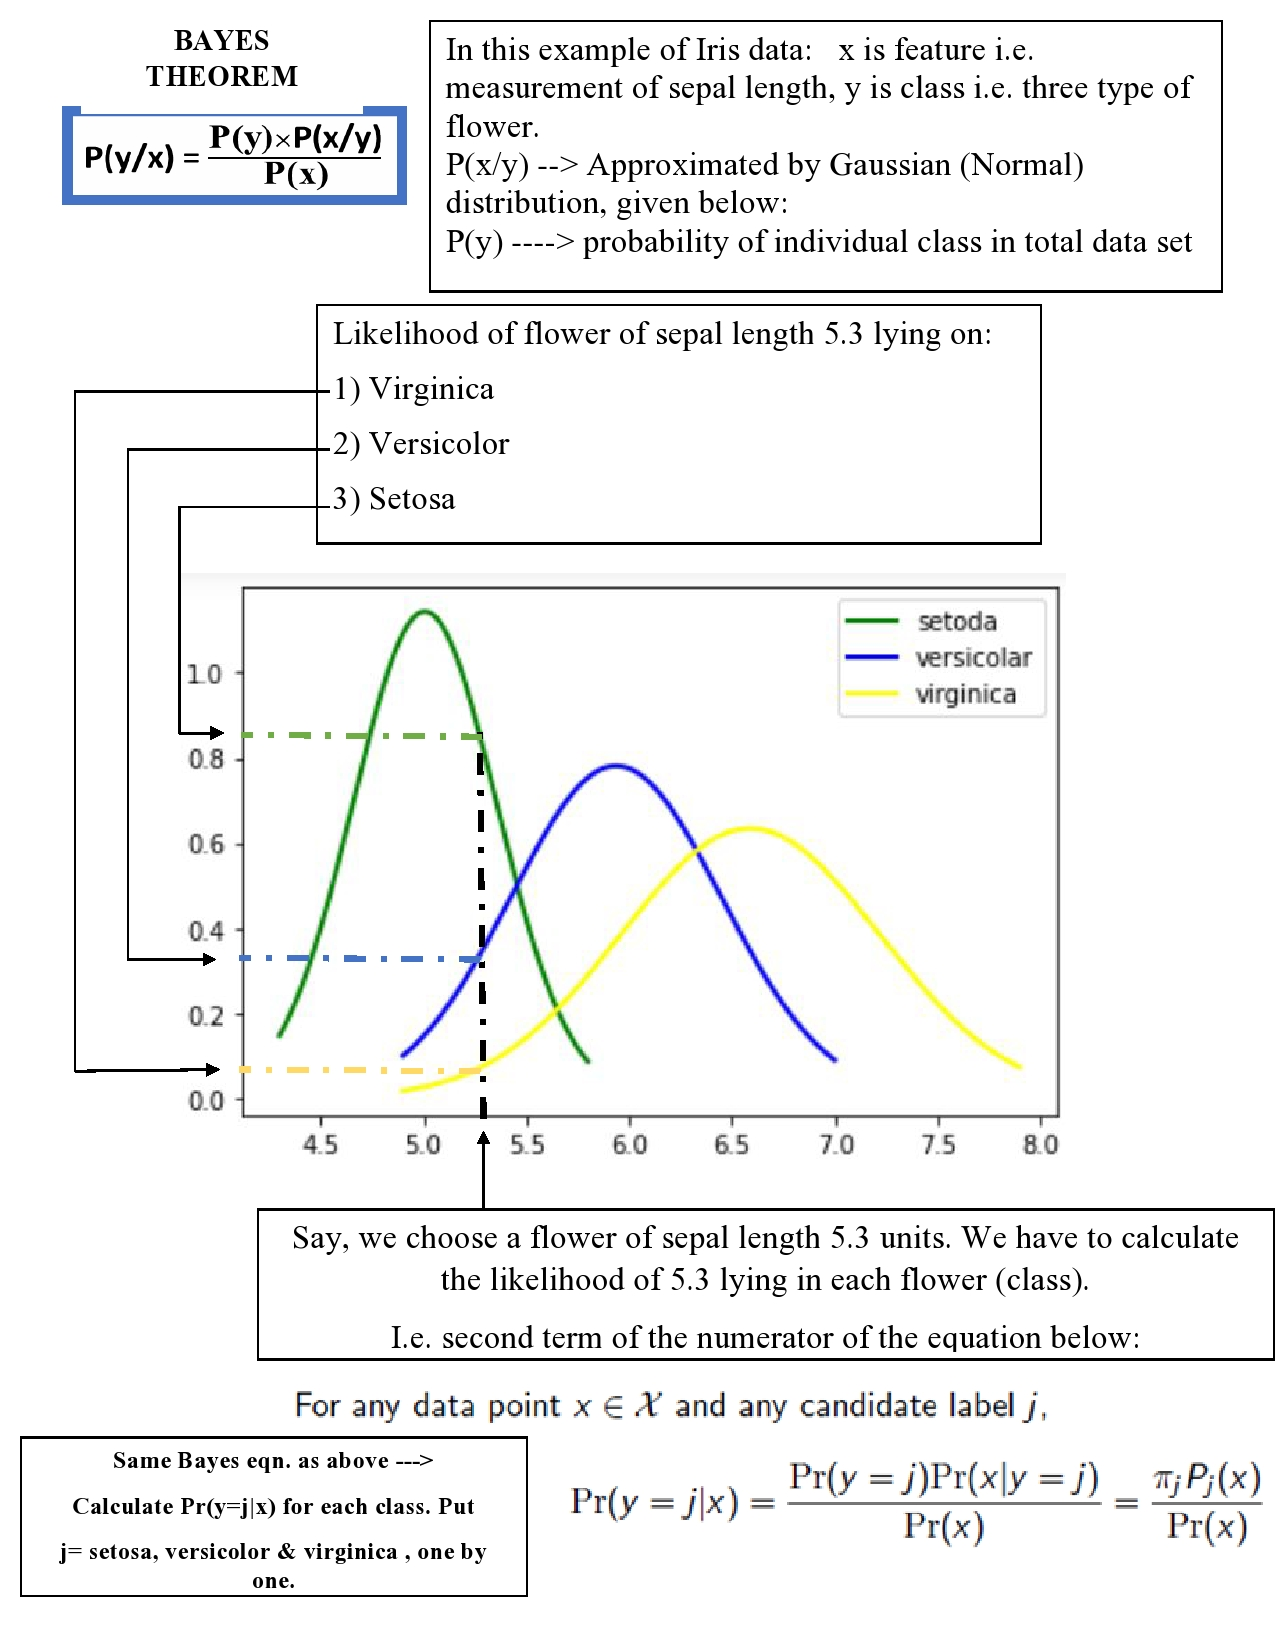

#### Note : In above equation the term in denominator --> ' Pr(x) ' can not be calculated.
#### But, we can calculate numerator part for all classes.
#### Final class of the test sample will be the one with highest numerator value among all three type.

#### Calculalating the likelihood of flower having sepal lenth of 5.3 unit lying on setosa class:
* Pr(x=5.3|y=setosa)

In [21]:
x=5.3 # sepal length of sample flower
u=np.mean(d_setosa)
sd=np.std(d_setosa)
# Using Normal Probability Distribution (given below) and calcualting likelihood i.e. Pr(x=5.3|y=setosa)
# denoting with yxp
yxp=(1/(sd * np.sqrt(2 * np.pi))) *np.exp( - (x - u)**2 / (2 * sd**2))
# yxp=stats.norm.pdf(6.7,loc=np.mean(d_setosa),scale=np.std(d_setosa)) # Using library,run unhashing it,will get same result
yxp

0.8016880125219623

* We have already calculated : Pr(y=setosa)
* Fianally probability, Pr(x=5.3|y=setosa)= Pr(y=setosa)X Pr(x=5.3|y=setosa)=0.33 X 0.801
* Note: Actually this is not probability as we haven't divided with denominator part being unknown.
* Finally making a function for calculating probability of sample lying in each class.

In [22]:
def prob_sample(x_sample,data_class,p_class):
    u=np.mean(data_class)
    sd=np.std(data_class)
    yxp=(1/(sd * np.sqrt(2 * np.pi))) *np.exp( - (x_sample - u)**2 / (2 * sd**2))
    p=yxp*p_class
    return p

In [23]:
### Probability fo sample lying on Setosa
x=5.3 # x_sample
se=prob_sample(x,d_setosa,p_classes[0])
### Probability fo sample lying on Versicolar
versi=prob_sample(x,d_versicolor,p_classes[1])
### Probability fo sample lying on Verginica
virgi=prob_sample(x,d_virginica,p_classes[2])
print("probability of being Setosa : ",se)
print("probability of being Versicolor : ",versi)
print("probability of being Virgininca : ",virgi)

probability of being Setosa :  0.26722933750732075
probability of being Versicolor :  0.11994517882057795
probability of being Virgininca :  0.02604377633759196


##### Normalization: 

* Divide all three by the sum of all three. 
* In above and below result we can see the highest value is for setosa, thus the sample flower is of Setosa class.

In [25]:
T=se+versi+virgi
#probability of setosa 
print('probability being of setosa: ', se/T)
#probability of versicolr
print('probability of being versicolor: ', versi/T)
#probability of verginica
print('probability of being verginica: ', virgi/T)

probability being of setosa:  0.6467025837204377
probability of being versicolor:  0.29027073812938925
probability of being verginica:  0.06302667815017321


### 2. For Mulitple feature we have to use Multivariate Gaussian
* To understand the theory we modelled our problem with univariate Gaussian by taking just one feature i.e. 'sepal length'in above example. But this will not be the accurate model.
* Now taking all feature, we can use Multivariate Gaussian for model our classification problem:
* Second term of numerator in Bayes theorem --> ' Pr(x|y) ' will be aproximated by Multivariate Gaussian given below.
* In equation below, p(x) = p (x {x1,x2,x3,x4} | y=j ) , where x1,x2,x3,x4 are all 4 feauture of any sample flower & 'j' is the class.

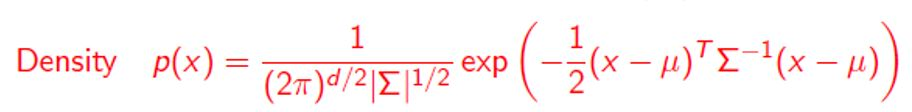

### Visiting Bi-variate (2d) Gaussian, which will help us to understand and implement each term of above eqn:
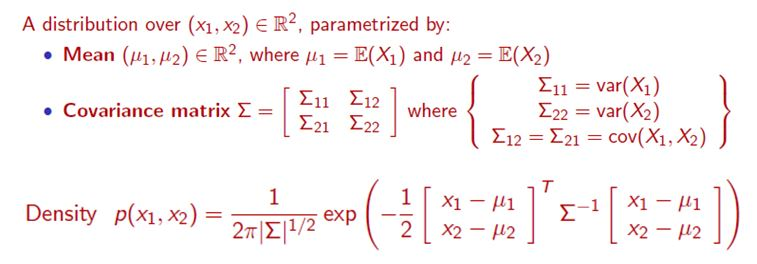

### Say we want to classify a flower with following features, taking as test sample:

In [26]:
test_sample=np.array([4.9, 3. , 1.4, 0.2])

### Calculating each term of the multivariate equation one by one and then implemeting together inside a function:
 ##### Calculating  the probability of sample lying in 'Iris-setosa'.

In [27]:
# Seperating Setosa
d_setosa=data.loc[data.Name=='Iris-setosa']
d_setosa=d_setosa.iloc[:,0:4]
# d_setosa

In [28]:
## mean of each features 
u=d_setosa.values.mean(axis=0) 
#u

In [29]:
# Subtracting corresponding mean from each feature of test sample
ts_Minus_u=test_sample-u
print(ts_Minus_u)
xu=ts_Minus_u[:,np.newaxis]  # ( test sample minus mean ) --> Transposed
print(xu)

[-0.106 -0.418 -0.064 -0.044]
[[-0.106]
 [-0.418]
 [-0.064]
 [-0.044]]


* We have calculated following term as 'xu':
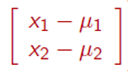

In [30]:
## Calculating covariance matrix
cov_mat=pd.DataFrame.cov(d_setosa) # Using padas
print(cov_mat)
#np.cov(d_setosa.T) ## Using numpy

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     0.124249    0.100298     0.016139    0.010547
SepalWidth      0.100298    0.145180     0.011682    0.011437
PetalLength     0.016139    0.011682     0.030106    0.005698
PetalWidth      0.010547    0.011437     0.005698    0.011494


In [31]:
from numpy.linalg import inv,det

In [32]:
###  Calculating inverse of covariance matrix
inv_cov_mat=inv(cov_mat)
print(inv_cov_mat,'\n')
###  Calculating determinant of covariance matrix
det_cov_mat=det(cov_mat)
det_cov_mat

[[ 19.03060756 -12.55528274  -4.8438204   -2.56861308]
 [-12.55528274  15.83184432   1.53218576  -4.99179989]
 [ -4.8438204    1.53218576  38.25444718 -16.04402019]
 [ -2.56861308  -4.99179989 -16.04402019 102.28045869]] 



2.1828022425752476e-06

#### Calculating P(X|Y), using combining each term we have caltulated step wise above :

In [33]:
## Term before exponential
f1=1/(((2*np.pi)**(4/2))*(det_cov_mat**(1/2)))
## Exponential term
f2=np.exp(-0.5*((xu.T).dot(inv_cov_mat)).dot(xu))
## combining together P(X|Y) = f1*f2
pxy=f1*f2
print(pxy)
# OR implement in one shot 
# pxy = (1/(((2*np.pi)**(4/2))*det_cov_mat**(1/2)))*np.exp(-0.5*((xu.T).dot(inv_cov_mat)).dot(xu)) 

[[6.49783045]]


* We have calculated --> Term before exponential as 'f1':
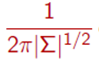

* WE have calculated --> Exponential term as 'f2':
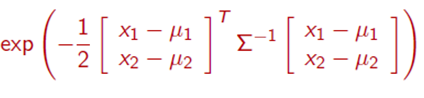

In [34]:
probability_of_sample_lying_in_setosa = p_classes[0]* pxy # p_classes[0]--> probability of setosa in entire dataset
probability_of_sample_lying_in_setosa
## Again note this is not probability, only the numerator part

array([[2.16594348]])

#### Note: In similar fashion, we have to calculalte for each class. After Normalization, class with highest value is the label of test sample. 

### Combing all together and Impelmenting inside function.

### Model Making
* The function 'train' below calculates:  mean, determinant of covariance matrix, inverse of covariance matrix and probability of each class after splitting the data set into data for each individual class.

In [35]:
def fit(data):
    classes=data.Name.unique()
    len_data=len(data)
    n=len(classes)
    ###############
    list_mu=[]      # stores mean of all the feature of each class
    list_det_cov=[] # stores the determinant of covariace matrix of each class
    list_inv_cov=[] # stores the inverse of covariace matrix of each class
    P_class=[]      # stores Probability of each class
    #############################
    for i in classes:
        d=data.loc[data.Name==i] # taking data of particular class 'i' only
        P_class.append(len(d)/len_data) # probability of class
        d=d.iloc[:,0:4].values
        u=d.mean(axis=0)           # mean of each features 
        list_mu.append(u)
        cov_mat=np.cov(d.T)        # covariance matrix
        inv_cov_mat=inv(cov_mat)  # Inverse of covariance Matrix
        det_cov_mat=det(cov_mat)  # Determinant of covariance Matrix
        list_det_cov.append(det_cov_mat)
        list_inv_cov.append(inv_cov_mat)
    return list_mu,list_det_cov,list_inv_cov,P_class,classes

In [36]:
list_mu,list_det_cov,list_inv_cov,P_class,classes=fit(data)

In [37]:
## Check by unhashing each and see the result and read the comment in the function above an try to understand ?
list_mu
# list_det_cov
#list_inv_cov
#P_class
# classes

[array([5.006, 3.418, 1.464, 0.244]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([6.588, 2.974, 5.552, 2.026])]

In [ ]:
## Collected few samples from  dataset so that we can test on our model
# test_sample=np.array([5.4, 3.4 , 1.7, 0.2]) ## setosa
# test_sample=np.array([6.3,2.5,5.0,1.9])    ## Virginica
# test_sample=np.array([6.3,3.3,4.7,1.6])   ## Virsicolor
## 5.4	3.4	1.7	0.2  ## Setosa
## 6.3	2.5	5.0	1.9	Iris-virginica
## 6.3	3.3	4.7	1.6	Iris-versicolor

### Predictions
* For single sample:

In [38]:
test_sample=np.array([6.3,3.3,4.7,1.6])   ## Virsicolor
list_Pxy=[] ## List  of P(X|Y) for each classes
n=len(classes)
for i in range(n):   # n= 0,1,2
    ts_Minus_u=test_sample-list_mu[i]
    xu=ts_Minus_u[:,np.newaxis]
    det_cov_mat=list_det_cov[i]
    inv_cov_mat=list_inv_cov[i]    
    Pxy=(1/(((2*np.pi)**(4/2))*det_cov_mat**(1/2)))*np.exp(-0.5*((xu.T).dot(inv_cov_mat)).dot(xu)) ## P(X|Y)
    list_Pxy.append(Pxy[0,0])
#############################################
classes[np.argmax(np.array(list_Pxy)*np.array([P_class]))]

'Iris-versicolor'

*  For Multiple Samples : Sample must be passed in 2D format

In [39]:
test_sample=np.array([[6.3,3.3,4.7,1.6],[5.4, 3.4 , 1.7, 0.2]]) 

In [40]:
Pred_Class_list=[] ## List of predictions for each sample
for j in range(len(test_sample)):  ## iteration for each individual sample
    list_Pxy=[]
    for i in range(n):
        ts_Minus_u=test_sample[j]-list_mu[i]
        xu=ts_Minus_u[:,np.newaxis]
        det_cov_mat=list_det_cov[i]
        inv_cov_mat=list_inv_cov[i]    
        Pxy=(1/(((2*np.pi)**(4/2))*det_cov_mat**(1/2)))*np.exp(-0.5*((xu.T).dot(inv_cov_mat)).dot(xu)) ## P(X|Y)
        list_Pxy.append(Pxy[0,0])
#############################################
    Pred_Class_list.append(classes[np.argmax(np.array(list_Pxy)*np.array([P_class]))])
Pred_Class_list    

['Iris-versicolor', 'Iris-setosa']

#### Implementing Inside function: 

In [41]:
test_sample=np.array([[6.3,3.3,4.7,1.6],[5.4, 3.4 , 1.7, 0.2]]) 

In [42]:
def prediction(test_sample):
    Pred_Class_list=[] ## List of predictions for each sample
    n=len(classes)
    for j in range(len(test_sample)):  ## iteration for each individual sample
        list_Pxy=[]
        for i in range(n):
            ts_Minus_u=test_sample[j]-list_mu[i]
            xu=ts_Minus_u[:,np.newaxis]
            det_cov_mat=list_det_cov[i]
            inv_cov_mat=list_inv_cov[i]    
            Pxy=(1/(((2*np.pi)**(4/2))*det_cov_mat**(1/2)))*np.exp(-0.5*((xu.T).dot(inv_cov_mat)).dot(xu)) ## P(X|Y)
            list_Pxy.append(Pxy[0,0])
#############################################
        Pred_Class_list.append(classes[np.argmax(np.array(list_Pxy)*np.array([P_class]))])
    return Pred_Class_list    

In [43]:
prediction(test_sample)

['Iris-versicolor', 'Iris-setosa']

#### Now its your time: Implement train test split yourself and check the accuracy score for test set.
#### Implemented in my linear regression module you can visit that.

### 3. Approaching same problem with Naive Bayes
* To model p(x|y), we will make a very strong assumption. We will assume that the xi’s are conditionally independent given y. This assumption is called the Naive Bayes (NB) assumption, and the resulting algorithm is called the Naive Bayes classifier.
* Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
      https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

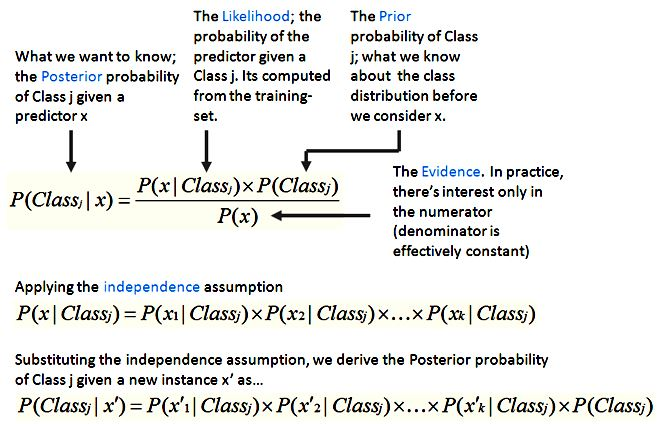

#### Copying few cell from section (1)

In [44]:
class_data=np.unique(data['Name'],return_counts=True)
print('unique class :',class_data[0],'\n','Counts: ', class_data[1])
p_classes=class_data[1]/np.sum(class_data[1])
print('Probability of each classe: ',p_classes)

unique class : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 
 Counts:  [50 50 50]
Probability of each classe:  [0.33333333 0.33333333 0.33333333]


In [45]:
## Separating three types of data
d_setosa=data.loc[data['Name']=='Iris-setosa'].values[:,:4]
d_versicolor=data.loc[data['Name']=='Iris-versicolor'].values[:,:4]
d_virginica=data.loc[data['Name']=='Iris-virginica'].values[:,:4]
d_setosa=d_setosa.astype('float')

In [46]:
test_sample=np.array([6.3,2.5,5.0,1.9])     ## sample from virgininca
f1=test_sample[0]
f2=test_sample[1]
f3=test_sample[2]
f4=test_sample[3]

In [47]:
## Calculating probability of this test sampel lying on Setosa
u=np.mean(d_setosa,axis=0)
sd=np.std(d_setosa,axis=0)
pyx_f1=(1/(sd[0] * np.sqrt(2 * np.pi))) *np.exp( - (f1 - u[0])**2 / (2 * sd[0]**2))
pyx_f2=(1/(sd[1] * np.sqrt(2 * np.pi))) *np.exp( - (f2 - u[1])**2 / (2 * sd[1]**2))
pyx_f3=(1/(sd[2] * np.sqrt(2 * np.pi))) *np.exp( - (f3 - u[2])**2 / (2 * sd[2]**2))
pyx_f4=(1/(sd[3] * np.sqrt(2 * np.pi))) *np.exp( - (f4 - u[3])**2 / (2 * sd[3]**2))
yxp=pyx_f1*pyx_f2*pyx_f3*pyx_f4
p=yxp*p_classes[0]
p

2.4214067142003593e-149

* In Similar fashion, we can calculate the probability of sample flower lying on rest two class. Final label of test sample will be the class with highest probability value.

In [ ]:
### Implementing inside function

In [48]:
def fit(data):
    classes=data.Name.unique()
    len_data=len(data)
    n=len(classes)
    ###############
    list_u=[]       # stores mean of all the feature of each class
    list_sd=[]
    P_class=[]      # stores Probability of each class
    #############################
    for i in classes:
        d=data.loc[data.Name==i] # taking data of particular class 'i' only
        P_class.append(len(d)/len_data) # probability of class
        d=d.iloc[:,0:4].values
        u=d.mean(axis=0)           # mean of each features
        list_u.append(u)
        sd=np.std(d,axis=0)
        list_sd.append(sd) 
    return list_u,list_sd,P_class,classes

In [49]:
list_u,list_sd,P_class,classes=fit(data)

In [50]:
def prediction(test_sample):
    n=len(classes)
    Pred_Class_list=[] ## List of predictions for each sample
    for j in range(len(test_sample)):  ## iteration for each individual sample
        list_Pxy=[]
        for i in range(n):
            sd=list_sd[i]
            u=list_u[i]
            p_i=P_class[i]
            for k in range(len(test_sample[j])):
                pxy=p_i*(1/(sd[k] * np.sqrt(2 * np.pi))) *np.exp( - (test_sample[j][k] - u[k])**2 / (2 * sd[k]**2))## P(X|Y)
            list_Pxy.append(pxy)
#############################################
        Pred_Class_list.append(classes[np.argmax(np.array(list_Pxy))])
    return Pred_Class_list    

In [51]:
test_sample=np.array([[6.3,3.3,4.7,1.6],[5.4, 3.4 , 1.7, 0.2]]) 

In [52]:
prediction(test_sample) ## test sample must be passed in 2D shape

['Iris-versicolor', 'Iris-setosa']

* Implement train test yourself and check the accuracy on test set.

#### This much for this module.
#### HAPPY LEARNING! 
#### Don't forget to follow me for more such stuff.
* https://www.linkedin.com/in/ramendra-kumar-57334478/
* https://github.com/Rami-RK